In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Generating random Lat. & Long, numbers for various cities around the world

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude from above
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


647

### Getting the weather data from a website using API and storing it in a list "city_data"

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# handling errors while parsing weather data from a JSON file using try-except
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | quchan
Processing Record 2 of Set 1 | ancud
Processing Record 3 of Set 1 | najran
Processing Record 4 of Set 1 | ejido
Processing Record 5 of Set 1 | hithadhoo
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | ngukurr
City not found. Skipping...
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | nikolskoye
Processing Record 12 of Set 1 | kalmunai
Processing Record 13 of Set 1 | lompoc
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | mporokoso
Processing Record 18 of Set 1 | upernavik
Processing Record 19 of Set 1 | east london
Processing Record 20 of Set 1 | umm lajj
Processing Record 21 of Set 1 | hilo
Processing Record 22 of Set 1 | sentyabrskiy
City not found. Skipping...
P

Processing Record 37 of Set 4 | roald
Processing Record 38 of Set 4 | xining
Processing Record 39 of Set 4 | duvan
Processing Record 40 of Set 4 | naze
Processing Record 41 of Set 4 | vardo
Processing Record 42 of Set 4 | taolanaro
City not found. Skipping...
Processing Record 43 of Set 4 | mangrol
Processing Record 44 of Set 4 | port hedland
Processing Record 45 of Set 4 | turtas
Processing Record 46 of Set 4 | victoria
Processing Record 47 of Set 4 | saint marys
Processing Record 48 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 49 of Set 4 | umm ruwabah
City not found. Skipping...
Processing Record 50 of Set 4 | alice springs
Processing Record 1 of Set 5 | penzance
Processing Record 2 of Set 5 | new norfolk
Processing Record 3 of Set 5 | port lincoln
Processing Record 4 of Set 5 | rio gallegos
Processing Record 5 of Set 5 | loa janan
Processing Record 6 of Set 5 | vao
Processing Record 7 of Set 5 | flinders
Processing Record 8 of Set 5 | saint anthon

Processing Record 24 of Set 8 | lakselv
Processing Record 25 of Set 8 | pitanga
Processing Record 26 of Set 8 | sadovoye
Processing Record 27 of Set 8 | aktash
Processing Record 28 of Set 8 | benjamin constant
Processing Record 29 of Set 8 | machilipatnam
Processing Record 30 of Set 8 | saint-francois
Processing Record 31 of Set 8 | fort nelson
Processing Record 32 of Set 8 | pacific grove
Processing Record 33 of Set 8 | kristiinankaupunki
Processing Record 34 of Set 8 | chapais
Processing Record 35 of Set 8 | portland
Processing Record 36 of Set 8 | san quintin
Processing Record 37 of Set 8 | havoysund
Processing Record 38 of Set 8 | birstonas
Processing Record 39 of Set 8 | kangaatsiaq
Processing Record 40 of Set 8 | faanui
Processing Record 41 of Set 8 | caravelas
Processing Record 42 of Set 8 | buon me thuot
City not found. Skipping...
Processing Record 43 of Set 8 | filandia
Processing Record 44 of Set 8 | tubruq
City not found. Skipping...
Processing Record 45 of Set 8 | richards

Processing Record 10 of Set 12 | quelimane
Processing Record 11 of Set 12 | davila
Processing Record 12 of Set 12 | margherita
Processing Record 13 of Set 12 | sterling
Processing Record 14 of Set 12 | visby
Processing Record 15 of Set 12 | caidian
Processing Record 16 of Set 12 | nuuk
Processing Record 17 of Set 12 | kargasok
Processing Record 18 of Set 12 | mao
Processing Record 19 of Set 12 | doha
Processing Record 20 of Set 12 | wagar
Processing Record 21 of Set 12 | sakakah
Processing Record 22 of Set 12 | antofagasta
Processing Record 23 of Set 12 | dodola
Processing Record 24 of Set 12 | tayga
Processing Record 25 of Set 12 | haibowan
City not found. Skipping...
Processing Record 26 of Set 12 | ilka
City not found. Skipping...
Processing Record 27 of Set 12 | masvingo
Processing Record 28 of Set 12 | mumbwa
Processing Record 29 of Set 12 | am timan
Processing Record 30 of Set 12 | asayita
City not found. Skipping...
Processing Record 31 of Set 12 | novouzensk
Processing Record 3

### Converting the array of dictionaries (city_data, which has all the data from API) to a DataFrame

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Quchan,37.1060,58.5095,66.02,68,0,4.16,IR,2021-09-18 18:44:38
1,Ancud,-41.8697,-73.8203,54.93,63,73,7.29,CL,2021-09-18 18:42:12
2,Najran,17.4924,44.1277,84.85,15,7,4.70,SA,2021-09-18 18:42:11
3,Ejido,8.5514,-71.2375,74.80,82,100,2.77,VE,2021-09-18 18:44:38
4,Hithadhoo,-0.6000,73.0833,83.07,73,77,5.06,MV,2021-09-18 18:42:04
5,Hermanus,-34.4187,19.2345,59.90,73,98,8.16,ZA,2021-09-18 18:42:02
6,Cape Town,-33.9258,18.4232,60.12,79,0,1.01,ZA,2021-09-18 18:40:51
7,Atuona,-9.8000,-139.0333,77.94,75,2,18.28,PF,2021-09-18 18:40:11
8,Rikitea,-23.1203,-134.9692,72.50,77,61,13.35,PF,2021-09-18 18:38:03
9,Nikolskoye,59.7035,30.7861,48.09,81,99,6.51,RU,2021-09-18 18:39:41


In [11]:
# reaaranging the order in which the columns appaer in the dataframe
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Quchan,IR,2021-09-18 18:44:38,37.1060,58.5095,66.02,68,0,4.16
1,Ancud,CL,2021-09-18 18:42:12,-41.8697,-73.8203,54.93,63,73,7.29
2,Najran,SA,2021-09-18 18:42:11,17.4924,44.1277,84.85,15,7,4.70
3,Ejido,VE,2021-09-18 18:44:38,8.5514,-71.2375,74.80,82,100,2.77
4,Hithadhoo,MV,2021-09-18 18:42:04,-0.6000,73.0833,83.07,73,77,5.06
...,...,...,...,...,...,...,...,...,...
582,Chernushka,RU,2021-09-18 18:46:53,56.5072,56.0766,36.50,87,94,13.13
583,Ajdabiya,LY,2021-09-18 18:46:53,30.7554,20.2263,79.77,59,0,11.95
584,Waddan,LY,2021-09-18 18:46:53,29.1614,16.1390,85.51,23,0,10.74
585,Stokmarknes,NO,2021-09-18 18:46:53,68.5646,14.9108,51.49,69,100,8.59


### Exporting the DataFrame to a comma-separated (CSV) file.

In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

### Plotting the data

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


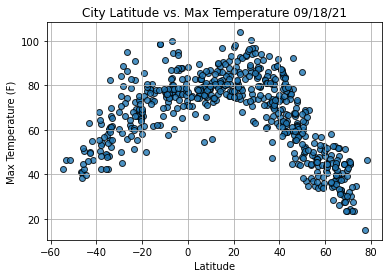

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

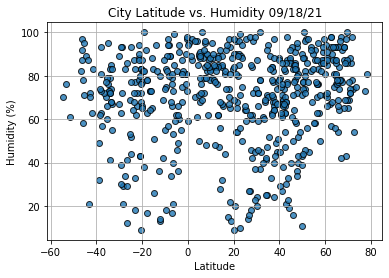

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

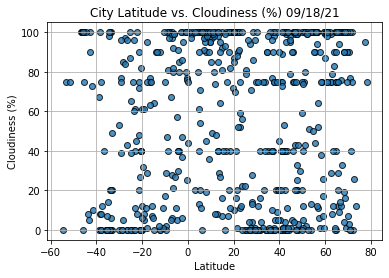

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

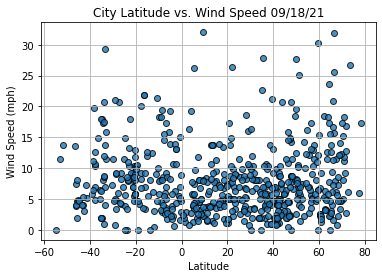

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()